# Data analysis for Three Body Problem

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Information about the dataset
Train data: <br>
| Variable  | Description                                      |
|-----------|--------------------------------------------------|
| `t`       | timestep                                         |
| `x_1`     | coordinate x of the position of object 1         |
| `y_1`     | coordinate y of the position of object 1         |
| `v_x_1`   | coordinate x of the velocity of object 1         |
| `v_y_1`   | coordinate y of the velocity of object 1         |
| `x_2`     | coordinate x of the position of object 2         |
| `y_2`     | coordinate y of the position of object 2         |
| `v_x_2`   | coordinate x of the velocity of object 2         |
| `v_y_2`   | coordinate y of the velocity of object 2         |
| `x_3`     | coordinate x of the position of object 3         |
| `y_3`     | coordinate y of the position of object 3         |
| `v_x_3`   | coordinate x of the velocity of object 3         |
| `v_y_3`   | coordinate y of the velocity of object 3         |

Test data:<br>

| Variable  | Description                                                    |
|-----------|----------------------------------------------------------------|
| `t`       | timestep                                                       |
| `x0_1`    | coordinate x of the position of object 1 at time t=0           |
| `y0_1`    | coordinate y of the position of object 1 at time t=0           |
| `x0_2`    | coordinate x of the position of object 2 at time t=0           |
| `y0_2`    | coordinate y of the position of object 2 at time t=0           |
| `x0_3`    | coordinate x of the position of object 3 at time t=0           |
| `y0_3`    | coordinate y of the position of object 3 at time t=0           |

For the test data, we only have the initial positions, and we assume that the initial velocity is zero

## Import the data

In [21]:
# Pandas csv will look in the current directory.
df = pd.read_csv("../data/mlNOVA/mlNOVA/X_train.csv")

## Data Stats

In [22]:
df.head()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4


In [23]:
df.tail()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
1284995,9.84375,-0.022787,-0.354678,-1.450539,-0.511101,-0.128897,-0.618452,1.066492,-0.497032,0.151684,0.973131,0.384048,1.008133,1284995
1284996,9.88281,-0.082072,-0.384254,-1.556362,-1.038875,-0.084507,-0.627569,1.177829,0.065469,0.166578,1.011822,0.378533,0.973406,1284996
1284997,9.92188,-0.140434,-0.438907,-1.348462,-1.794786,-0.040823,-0.610311,0.975436,0.853069,0.181257,1.049218,0.373027,0.941717,1284997
1284998,9.96094,-0.177344,-0.524277,-0.380080,-2.492241,-0.018380,-0.561151,0.012292,1.579595,0.195724,1.085428,0.367788,0.912645,1284998
1284999,10.00000,-0.163264,-0.618197,1.029575,-2.079003,-0.046730,-0.502346,-1.392434,1.193499,0.209994,1.120543,0.362860,0.885505,1284999


In [24]:
df.columns

Index(['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2',
       'x_3', 'y_3', 'v_x_3', 'v_y_3', 'Id'],
      dtype='object')

In [15]:
# Some statistics about the data
df.describe()

,Id,t,x0_1,y0_1,x0_2,y0_2,x0_3,y0_3
count,1.041621e+06,1.041621e+06,1041621.0,1041621.0,1.041621e+06,1.041621e+06,1.041621e+06,1.041621e+06
mean,5.208100e+05,5.000000e+00,1.0,0.0,-2.309950e-01,5.144233e-01,-7.690050e-01,-5.144233e-01
std,3.006902e+05,2.898007e+00,0.0,0.0,1.375241e-01,2.545084e-01,1.375241e-01,2.545084e-01
min,0.000000e+00,0.000000e+00,1.0,0.0,-4.979092e-01,6.846025e-03,-9.998843e-01,-9.657217e-01
25%,2.604050e+05,2.500000e+00,1.0,0.0,-3.459596e-01,3.036559e-01,-8.892568e-01,-7.371673e-01
50%,5.208100e+05,5.000000e+00,1.0,0.0,-2.293032e-01,5.175921e-01,-7.706968e-01,-5.175921e-01
75%,7.812150e+05,7.500000e+00,1.0,0.0,-1.107432e-01,7.371673e-01,-6.540404e-01,-3.036559e-01
max,1.041620e+06,1.000000e+01,1.0,0.0,-1.157003e-04,9.657217e-01,-5.020908e-01,-6.846025e-03


## Some Visualizations

In [28]:
idx = np.hstack((0, df[df.t == 10].index.values +1))
idx.shape, df.t.min(), df.t.max()

((4054,), np.float64(0.0), np.float64(10.0))

In [49]:
def plot_indx(k):
    """Given an index k, prints the respective trajetories

    Parameters
    ----------
    k : int
        The row of the trajetory

    """
    print(k) # The index being used
    pltidx = range(idx[k], 257+idx[k])
    pltsquare = idx[k]

    # Plot the tragetories
    plt.plot(df.x_1[pltidx], df.y_1[pltidx])
    plt.plot(df.x_2[pltidx], df.y_2[pltidx])
    plt.plot(df.x_3[pltidx], df.y_3[pltidx])

    # Plot the initial positions
    plt.plot(df.x_1[pltsquare], df.y_1[pltsquare], 's')
    plt.plot(df.x_2[pltsquare], df.y_2[pltsquare], 's')
    plt.plot(df.x_3[pltsquare], df.y_3[pltsquare], 's')

    plt.show()

3863


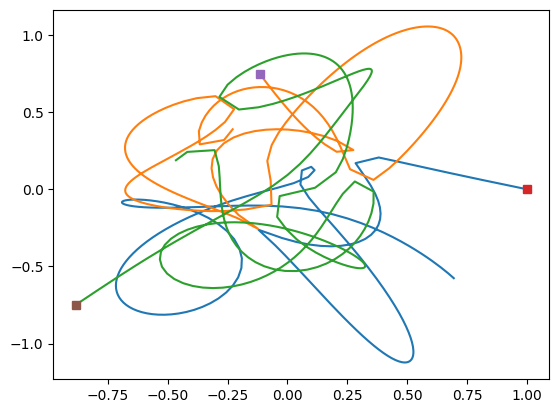

In [56]:
# Selecting a random index from the dataset
k = np.random.randint(idx.shape[0])
plot_indx(k)

### Colisions:
When the 3 objects collide, we obtain a lot of sets of zero up to time 10. These block of zeros are meaningless

2105


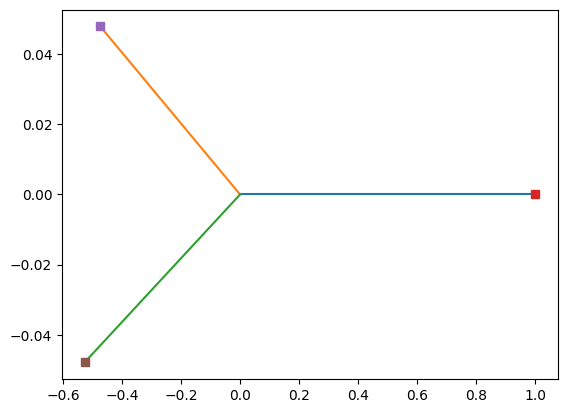

In [57]:
# Plotting a colision
k = 2105
plot_indx(k)